In [4]:
from keras._tf_keras import keras
from keras._tf_keras.keras import layers
from keras._tf_keras.keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
60000 train samples
10000 test samples
image shape (28, 28)


label:  5


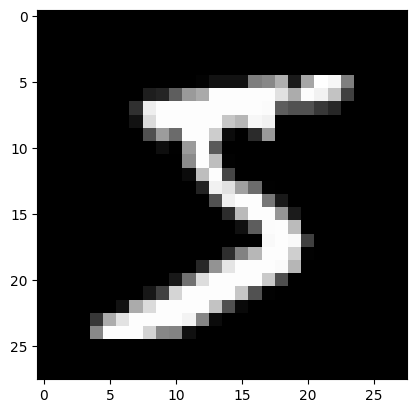

In [3]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]

plt.imshow(image, cmap='gray')
plt.show()

In [5]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print('input shape: ', x_train.shape[1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input shape:  784


In [6]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])

/home/yevhenii/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1734981392.062561   77467 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4898 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2d:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10


2024-12-23 21:16:58.175110: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.
2024-12-23 21:16:58.845101: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.
I0000 00:00:1734981419.645640   78406 service.cc:148] XLA service 0x7f27f000ad40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734981419.645847   78406 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-12-23 21:16:59.687044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734981419.820520   78406 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-23 21:17:02.064131: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers 

750/750 - 10s - 13ms/step - accuracy: 0.9363 - loss: 0.2129 - val_accuracy: 0.9636 - val_loss: 0.1186
Epoch 2/10
750/750 - 2s - 3ms/step - accuracy: 0.9742 - loss: 0.0831 - val_accuracy: 0.9715 - val_loss: 0.0929
Epoch 3/10
750/750 - 2s - 3ms/step - accuracy: 0.9822 - loss: 0.0560 - val_accuracy: 0.9713 - val_loss: 0.0926
Epoch 4/10
750/750 - 2s - 3ms/step - accuracy: 0.9877 - loss: 0.0381 - val_accuracy: 0.9763 - val_loss: 0.0847
Epoch 5/10
750/750 - 3s - 3ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9718 - val_loss: 0.1043
Epoch 6/10
750/750 - 3s - 4ms/step - accuracy: 0.9908 - loss: 0.0281 - val_accuracy: 0.9768 - val_loss: 0.1013
Epoch 7/10
750/750 - 2s - 3ms/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9780 - val_loss: 0.0951
Epoch 8/10
750/750 - 3s - 3ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9753 - val_loss: 0.1113
Epoch 9/10
750/750 - 3s - 3ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9767 - val_loss: 0.1012
Epoch 10/1

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

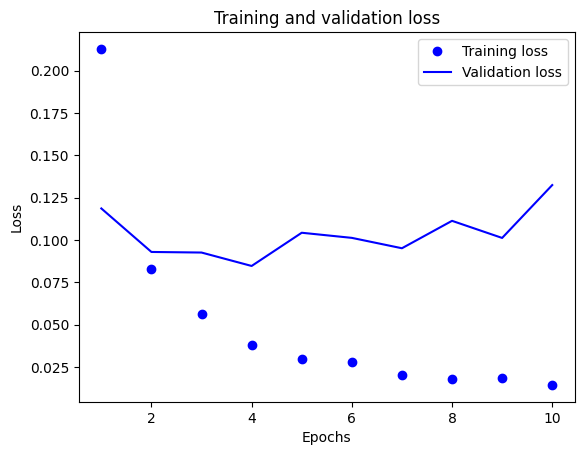

In [9]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'{model.metrics_names[0]} score:', score[0])
print(f'{model.metrics_names[1]} score:', score[1])

loss score: 0.11720434576272964
compile_metrics score: 0.9749000072479248
